In [119]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [123]:
img_array = cv2.imread('C:/Users/MSI I5/Documents/training/0/Training_3908.jpg') 

In [124]:
print(img_array)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


In [125]:
img_array.shape #rgbimage

(48, 48, 3)

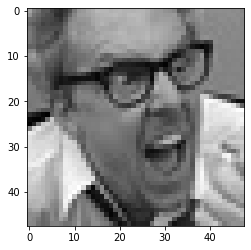

In [126]:
plt.imshow(img_array)

In [127]:
Datadirectory = 'C:/Users/MSI I5/Documents/training' #trainingdataset

In [128]:
classes = ["0","1","2","3","4","5","6"] #list of classes

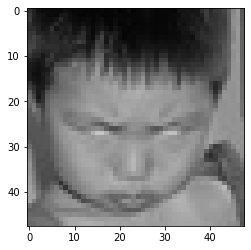

In [129]:
 for category in classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

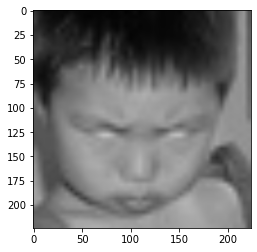

In [130]:
#change the size of the image
img_size= 224  #imagenet 224*224
new_array= cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()
        

In [131]:
#see the new size
new_array.shape

(224, 224, 3)

In [132]:
#read all the images and converting them into array    
training_Data = [] #data array

def create_training_Data():
    for category in classes:
        path = os.path.join(Datadirectory,category)
        class_num = classes.index(category) #0,1 LABEL
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass


In [133]:
create_training_Data()
print("loaded")

loaded


In [134]:
##### read how much images 
print(len(training_Data))

28709


In [135]:
temp = np.array(training_Data , dtype=object ,)

In [136]:
temp.shape

(28709, 2)

In [137]:
#shuffling the num of images for the model to be dynamic and robust
import random

In [138]:
random.shuffle(training_Data)

In [142]:
X= []
y=[]
for features , label in training_Data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1, img_size , img_size , 3)  
X=X.astype('float16')
  



In [143]:
X.shape

(28709, 224, 224, 3)

In [144]:
###normalize the data
X= X/255.0;

In [145]:
type(y)

list

In [146]:
y= np.array(y)

In [147]:
y.shape

(28709,)

# deep learning model for training mobilenetv2 architecture



In [148]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [149]:
temp = tf.keras.applications.mobilenet_v2.MobileNetV2() ###pretrained model

In [150]:
temp.summary() #mobilenet accepts 224

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [151]:
base_input = temp.layers[0].input 

In [152]:
base_output = temp.layers[-2].output


In [153]:
final_output = tf.keras.layers.Dense(128)(base_output) ### adding new layer , after the output of global pooling layer
final_ouput = tf.keras.layers.Activation('relu')(final_output) ###activation function
final_output = tf.keras.layers.Dense(64)(final_ouput)
final_ouput = tf.keras.layers.Activation('relu')(final_output)
final_output = tf.keras.layers.Dense(7, activation='softmax')(final_ouput) ###my classes are 7, classification layer 
###

In [154]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_14')>

In [155]:
new_model = tf.keras.Model(inputs = base_input , outputs = final_output)

In [156]:
new_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [157]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [158]:
new_model.fit(X,y,epochs = 25)


Epoch 1/25
898/898 [==============================] - 2466s 3s/step - loss: 1.2392 - accuracy: 0.5334
Epoch 2/25
898/898 [==============================] - 2375s 3s/step - loss: 1.0663 - accuracy: 0.6016
Epoch 3/25
898/898 [==============================] - 2403s 3s/step - loss: 0.9990 - accuracy: 0.6267
Epoch 4/25
898/898 [==============================] - 2365s 3s/step - loss: 0.9429 - accuracy: 0.6493
Epoch 5/25
898/898 [==============================] - 2367s 3s/step - loss: 0.8943 - accuracy: 0.6688
Epoch 6/25
898/898 [==============================] - 2493s 3s/step - loss: 0.8454 - accuracy: 0.6844
Epoch 7/25
898/898 [==============================] - 2637s 3s/step - loss: 0.7971 - accuracy: 0.7062
Epoch 8/25
898/898 [==============================] - 2357s 3s/step - loss: 0.7435 - accuracy: 0.7267
Epoch 9/25
898/898 [==============================] - 2336s 3s/step - loss: 0.6895 - accuracy: 0.7447
Epoch 10/25
898/898 [==============================] - 2360s 3s/step - loss: 0.643

In [159]:
new_model.save('Final_model_95p07.h5')

In [160]:
new_model = tf.keras.models.load_model('Final_model_95p07.h5')


In [161]:
frame = cv2.imread("happyboy.jpg")

In [162]:
frame.shape

(282, 425, 3)

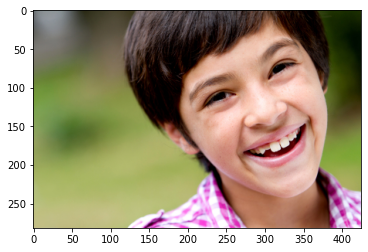

In [163]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [164]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [165]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [166]:
gray.shape

(282, 425)

In [167]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y),(x+w, y+h),(255,0,0), 2) ###bgr
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

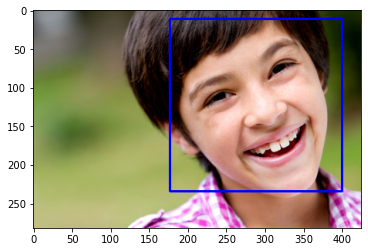

In [168]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

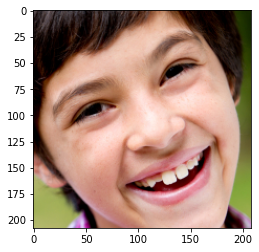

In [169]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [170]:
final_image = cv2.resize(face_roi,(224,224))

In [171]:
final_image = np.expand_dims(final_image,axis = 0) ###nees fourth dimension

In [172]:
final_image=final_image/255.0 

In [173]:
predictions =new_model.predict(final_image)

In [174]:
predictions[0]

array([2.6318543e-07, 4.5213260e-09, 2.9422123e-05, 9.9993682e-01,
       9.0200082e-08, 3.0957087e-06, 3.0283156e-05], dtype=float32)

In [175]:
np.argmax(predictions)

3